In [1]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Basic Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Dataset
df = pd.read_csv('marketing_AB.csv')
df.head(6)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10


In [4]:
# Removing unnecessary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(6)

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
5,1137664,ad,False,734,Saturday,10


In [7]:
# Checking for Duplicate records based on user ID
df.duplicated(subset = 'user id').sum()

0

In [8]:
# Droping User_ID column as User_ID is Qualitative Data
df.drop(['user id'], axis=1, inplace=True)
df.head(6)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
5,ad,False,734,Saturday,10


In [9]:
# Seeing the data structure
df.shape

(588101, 5)

In [10]:
# Seeing the data types and checkking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [11]:
# Checking how many unique values in categorical variable
cat_columns = ['test group','converted','most ads day','most ads hour']
df_cat = df[cat_columns]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [28]:
# Checking what are the unique columns in cat_columns
for col in cat_columns:
    print(f'{col}: {df_cat[col].unique()}')

test group: ['ad' 'psa']
converted: [False  True]
most ads day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour: [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# ***Univariate Analysis***

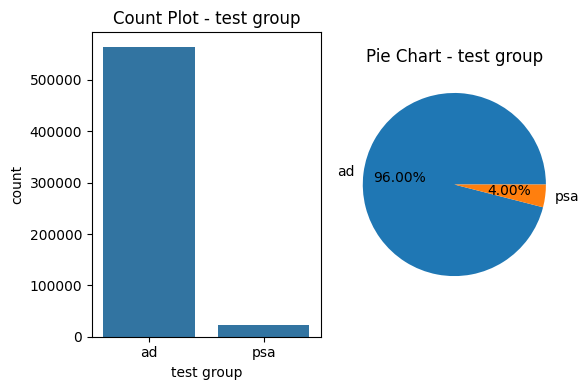

In [39]:
Var = 'test group'
plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=Var, data=df)
plt.title(f'Count Plot - {Var}')
# Pie Chart
plt.subplot(1,2,2)
counts = df[Var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie Chart - {Var}")
plt.tight_layout()
plt.show()

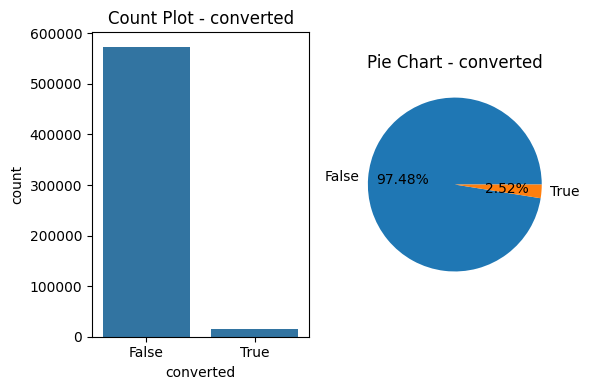

In [40]:
Var = 'converted'
plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=Var, data=df)
plt.title(f'Count Plot - {Var}')
# Pie Chart
plt.subplot(1,2,2)
counts = df[Var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie Chart - {Var}")
plt.tight_layout()
plt.show()

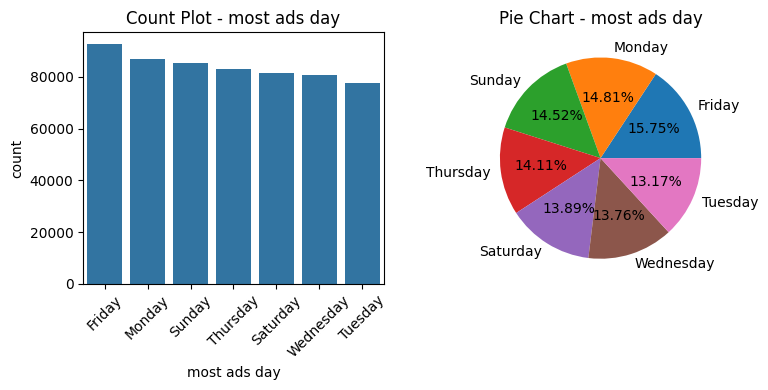

In [44]:
Var = 'most ads day'
plt.figure(figsize=(8,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=Var, data=df, order=df[Var].value_counts().index)
plt.title(f'Count Plot - {Var}')
plt.xticks(rotation=45)
# Pie Chart
plt.subplot(1,2,2)
counts = df[Var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie Chart - {Var}")
plt.tight_layout()
plt.show()

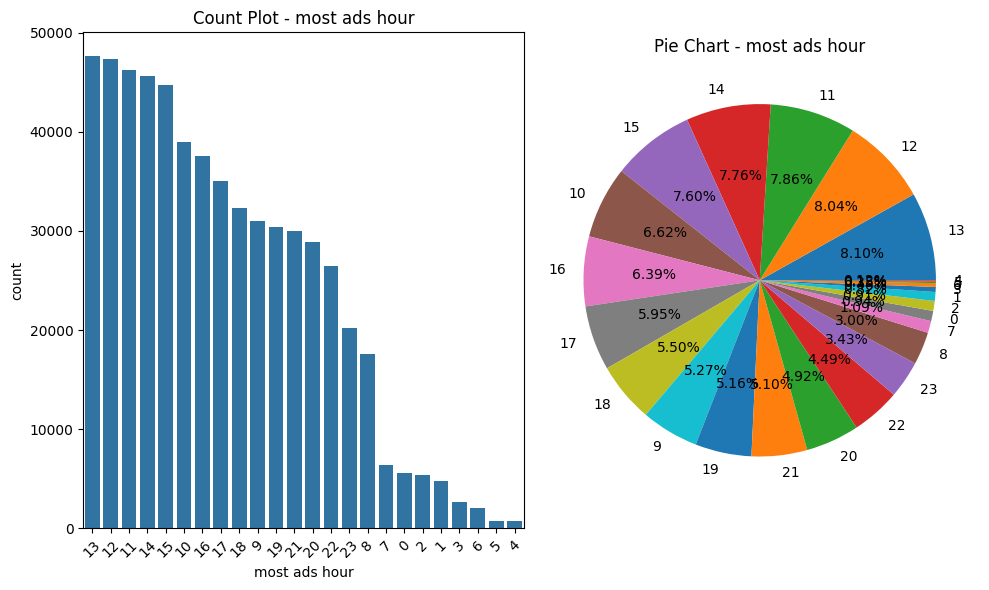

In [45]:
Var = 'most ads hour'
plt.figure(figsize=(10,6))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x=Var, data=df, order=df[Var].value_counts().index)
plt.title(f'Count Plot - {Var}')
plt.xticks(rotation=45)
# Pie Chart
plt.subplot(1,2,2)
counts = df[Var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie Chart - {Var}")
plt.tight_layout()
plt.show()

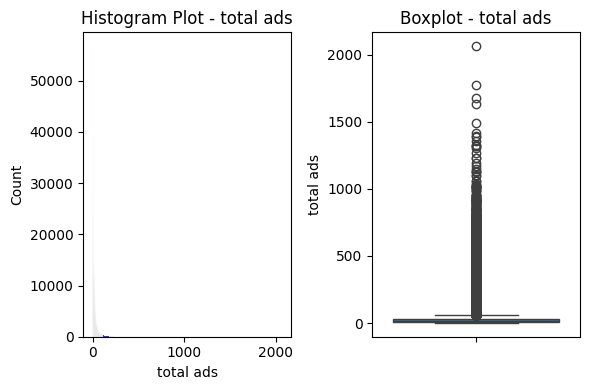

In [50]:
# Continious Varibale analysis
Var = 'total ads'
plt.figure(figsize=(6,4))
# histogram
plt.subplot(1,2,1)
sns.histplot(x=Var, data=df, color = 'blue')
plt.title(f'Histogram Plot - {Var}')
# Box Plots
plt.subplot(1,2,2)
sns.boxplot(y = Var, data = df)
plt.title(f"Boxplot - {Var}")
plt.tight_layout()
plt.show()

In [51]:
# Since the above diagrams are not easy to read.
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


# ***Bivariate Analysis***

In [52]:
Target_var = df['converted']
Perdictors = df.drop(['converted'], axis=1)

converted      False     True 
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


<Axes: xlabel='test group'>

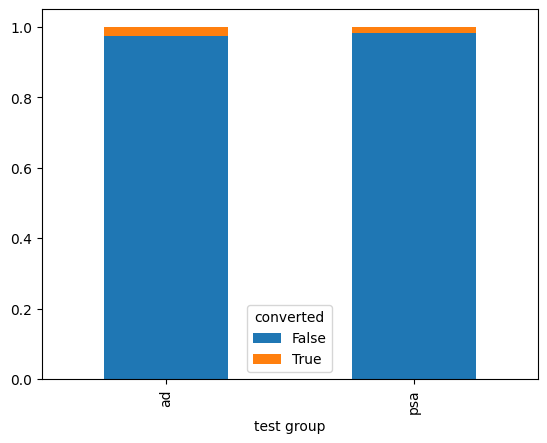

In [55]:
# Checking Cross Tab with test group
ctg = pd.crosstab(df['test group'], df['converted'],normalize='index')
print(ctg)
ctg.plot(kind='bar', stacked=True)

converted        False     True 
most ads day                    
Friday        0.977788  0.022212
Monday        0.967188  0.032812
Saturday      0.978949  0.021051
Sunday        0.975524  0.024476
Thursday      0.978429  0.021571
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942


<Axes: xlabel='most ads day'>

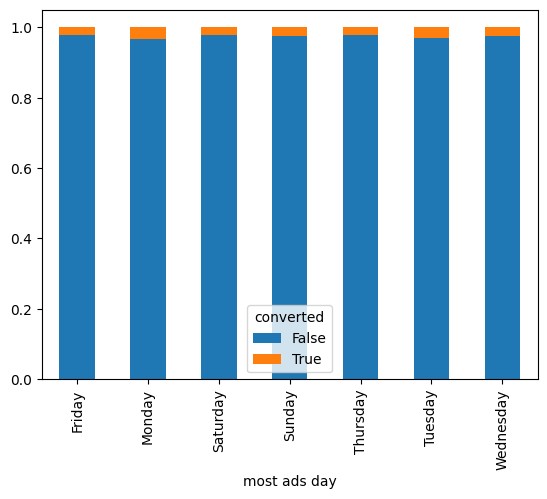

In [58]:
# Checking Cross Tab with most ads day
ctg_1 = pd.crosstab(df['most ads day'], df['converted'],normalize='index')
print(ctg_1)
ctg_1.plot(kind='bar', stacked=True)

converted         False     True 
most ads hour                    
0              0.981575  0.018425
1              0.987089  0.012911
2              0.992687  0.007313
3              0.989548  0.010452
4              0.984765  0.015235
5              0.979085  0.020915
6              0.977756  0.022244
7              0.981889  0.018111
8              0.980484  0.019516
9              0.980809  0.019191
10             0.978479  0.021521
11             0.977884  0.022116
12             0.976172  0.023828
13             0.975323  0.024677
14             0.971937  0.028063
15             0.970347  0.029653
16             0.969228  0.030772
17             0.971790  0.028210
18             0.972620  0.027380
19             0.973280  0.026720
20             0.970197  0.029803
21             0.971077  0.028923
22             0.973895  0.026105
23             0.977338  0.022662


<Axes: xlabel='most ads hour'>

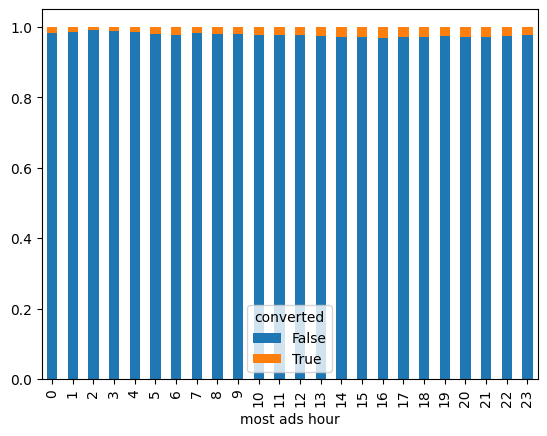

In [59]:
# Checking Cross Tab with most ads hour
ctg_2 = pd.crosstab(df['most ads hour'], df['converted'],normalize='index')
print(ctg_2)
ctg_2.plot(kind='bar', stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

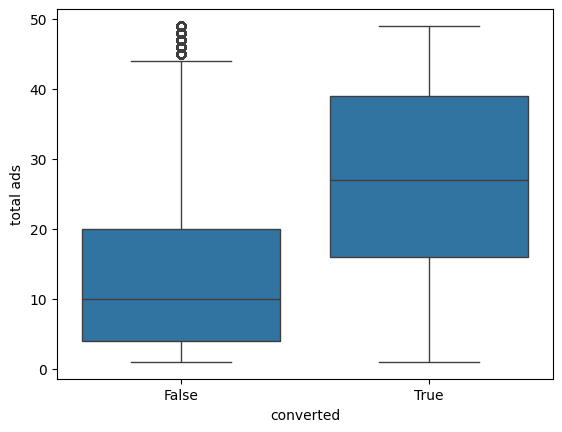

In [60]:
# For total ads
sns.boxplot(x='converted', y='total ads', data=df[df['total ads']<50])


Conversion Rates by Most Ads Hour:
most ads hour
0     0.018425
1     0.012911
2     0.007313
3     0.010452
4     0.015235
5     0.020915
6     0.022244
7     0.018111
8     0.019516
9     0.019191
10    0.021521
11    0.022116
12    0.023828
13    0.024677
14    0.028063
15    0.029653
16    0.030772
17    0.028210
18    0.027380
19    0.026720
20    0.029803
21    0.028923
22    0.026105
23    0.022662
Name: converted, dtype: float64


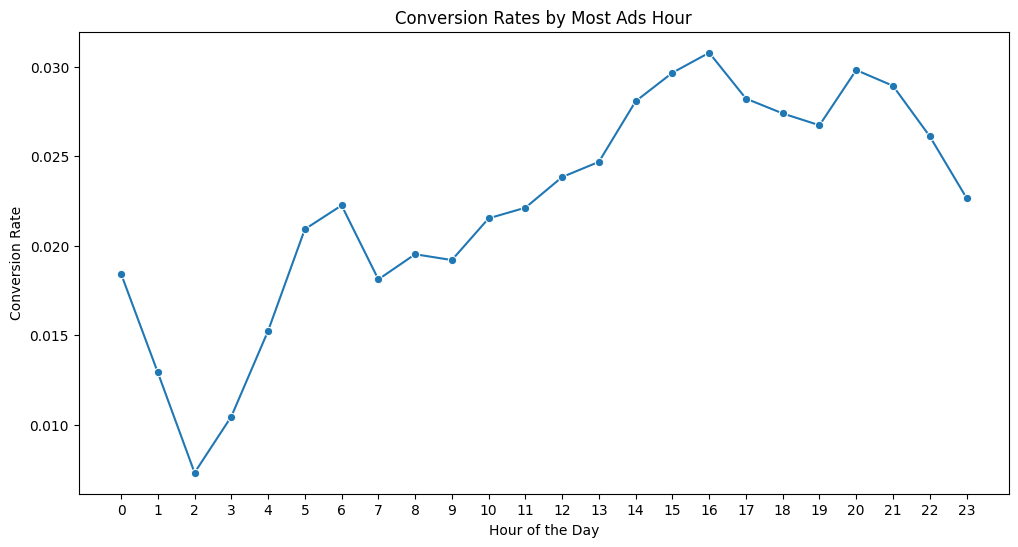

In [62]:
conversion_by_hour = df.groupby('most ads hour')['converted'].mean()
print("\nConversion Rates by Most Ads Hour:")
print(conversion_by_hour)

plt.figure(figsize=(12, 6))
sns.lineplot(x=conversion_by_hour.index, y=conversion_by_hour.values, marker = 'o')
plt.title('Conversion Rates by Most Ads Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.xticks(range(0, 24))
plt.show()

# **A/B Testing**

In [66]:
# Test_1
conversion_rates = df.groupby('test group')['converted'].mean()
conversion_rates
conversion_counts = df.groupby('test group')['converted'].sum()
sample_sizes = df['test group'].value_counts()

print(f"Conversion Rates:{conversion_rates}")
print(f"\nConversion Counts:{conversion_counts}")
print(f"\nSample Sizes: {sample_sizes}")

Conversion Rates:test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Conversion Counts:test group
ad     14423
psa      420
Name: converted, dtype: int64

Sample Sizes: test group
ad     564577
psa     23524
Name: count, dtype: int64


In [75]:
# Test 2
from scipy.stats import chi2_contingency

alpha = 0.05
for variable in Perdictors[['test group', 'most ads day', 'most ads hour']]:
  # Create a cross tabulation
    contingency_table = pd.crosstab(Target_var, df[variable])
    # Perform chi2_contingency test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Display the result
    print(f"\nVariable: {variable} vs Converted")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")

    # Check the significance
    if p < alpha:
        print("Reject the null hypothesis. There is a statistical significant association.")
    else:
        print("Fail to reject the null hypothesis. There is no statistical significant association.")


Variable: test group vs Converted
Chi2 Statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Reject the null hypothesis. There is a statistical significant association.

Variable: most ads day vs Converted
Chi2 Statistic: 410.0478857936585
P-value: 1.932184379244731e-85
Reject the null hypothesis. There is a statistical significant association.

Variable: most ads hour vs Converted
Chi2 Statistic: 430.76869230822086
P-value: 8.027629823696771e-77
Reject the null hypothesis. There is a statistical significant association.


# **ANOVA test**

In [77]:
from scipy.stats import f_oneway

ad_group = df[df['test group'] == 'ad']['total ads']
psa_group = df[df['test group'] == 'psa']['total ads']

f_stat, p_val = f_oneway(ad_group, psa_group)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in the average number of ads viewed between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in the average number of ads viewed between the groups.")

F-statistic: 0.045759626208427315
P-value: 0.8306134187285898
Fail to reject the null hypothesis: There is no statistically significant difference in the average number of ads viewed between the groups.
